In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

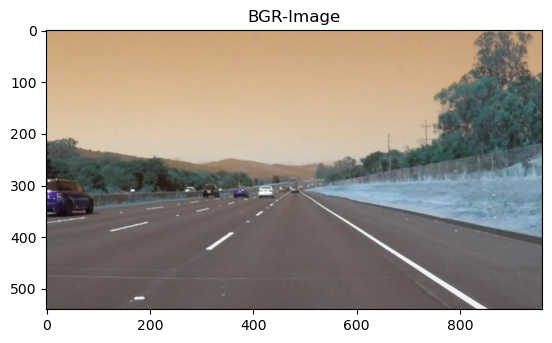

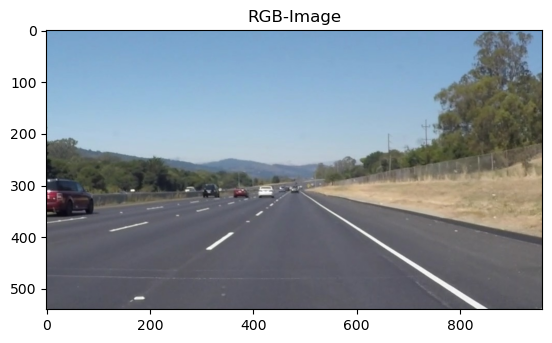

In [12]:
#-------------------------------------------------------------
#BGR TO RGB CONVERSION
#-------------------------------------------------------------
def bgr_rgb(image):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb

# BGR TO RGB CONVERSION
bgr=img = cv2.imread('solidWhiteRight.jpg')
rgb=bgr_rgb(bgr)
plt.imshow(bgr)
plt.title('BGR-Image')
plt.show()
plt.imshow(rgb)
plt.title('RGB-Image')
plt.show()

In [13]:
#--------------------------------------------------------------
#REGION OF INTEREST 
#--------------------------------------------------------------
def region_of_interest(image_height, image_width,xsize,ysize):
    left_bottom = [100, image_height - 1]
    right_bottom = [950, image_height - 1]
    apex = [480, 290]
    
    fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
    fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
    fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
    
    XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
    region_thresholds = (YY > (XX * fit_left[0] + fit_left[1])) & \
                        (YY > (XX * fit_right[0] + fit_right[1])) & \
                        (YY < (XX * fit_bottom[0] + fit_bottom[1]))
    
    return region_thresholds

In [14]:
#--------------------------------------------------------------
#COLOUR THRESHOLD CALCULATION
#--------------------------------------------------------------
def c_thresh(image):
    # Define color selection criteria
    red_threshold = 200
    green_threshold = 200
    blue_threshold = 200
    rgb_threshold = [red_threshold, green_threshold, blue_threshold]
    
    color_thresholds = (image[:, :, 0] < rgb_threshold[0]) | \
                       (image[:, :, 1] < rgb_threshold[1]) | \
                       (image[:, :, 2] < rgb_threshold[2])
    return color_thresholds

In [15]:
#---------------------------------------------------------------
#IMAGE PROCESSING FUNCTION 
#---------------------------------------------------------------
def process_image(image):
    # Convert to RGB
    image_rgb=bgr_rgb(image)
        
    ysize = image.shape[0]
    xsize = image.shape[1]
    line_image = np.copy(image)
    color_select=np.copy(image)

    region_thresholds = region_of_interest(539,680,xsize,ysize)

    color_thresholds=c_thresh(image)

    # Mask color and region selection
    color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
    # Color pixels green where both color and region selections met
    # line_image[~color_thresholds & region_thresholds] = [79,250,161]
    line_image[~color_thresholds & region_thresholds] = [0,255,91]

    # Add the line to the original image
    combo_image = cv2.addWeighted(image, 0.001, line_image, 1, 1)

    return combo_image

In [16]:
#=====================================================================
# MAIN IMPLEMENTATION
#=====================================================================
# Open video file
cap = cv2.VideoCapture('solidWhiteRight.mp4')
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while cap.isOpened():
    ret, image = cap.read()

    if not ret:
        print("Completed !")
        break

    # Process the image
    result = process_image(image)

    # Display the processed image
    cv2.imshow('image', result)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Completed !
